# OBJECTIVE:

# To do Exploratory Data Analysis,Data Preprocessing and Cleaning on Amazon food reviews.And then applied T-distributed Stochastic Neighborhood Embedding on reviews

In [33]:
%%time
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import random

Wall time: 0 ns


In [35]:
data=pd.read_csv('Reviews.csv')
print("shape",data.shape)
data.head()

shape (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
%%time
data['Score'].value_counts()

Wall time: 20 ms


5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [11]:
%%time
#Converting score coloumn to positive or negative review
data['Score'] = data['Score'].apply(lambda x : 'pos' if x > 3 else 'neg')
data.groupby('Score')['Summary'].count()

Wall time: 458 ms


# Data cleaning:

In [14]:
%%time
#1) Data Deduplication
#Sorting data according to ProductId in ascending order
sorted_data=data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quiksort',na_position='last')
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)
print("shape of data after Deduplication of entries:", final.shape)

shape of data after Deduplication of entries: (393933, 10)
Wall time: 2.64 s


In [15]:
%%time
#2) Helpfullness Numerator Greater than Helpfullness Denominator
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]
print("shape of data after data duplication:",final.shape)
#seeing how many no.of positive reviews and negative reviews
final['Score'].value_counts()

shape of data after data duplication: (393931, 10)
Wall time: 209 ms


# Text Preprocessing: Stemming,Stop-word removal and Lemmatization

In [16]:
%%time
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#Function for HTML Tag removal
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    return cleantext
#Function for  Punctuations Removal
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
stop = set(stopwords.words('english'))  #set of stopwords
sno = nltk.stem.SnowballStemmer('english')   #initialising the snowball stemmer

Wall time: 52 ms


In [17]:
%%time
#sorting the data based on time
final.sort_values('Time',inplace=True)
final = final.reset_index(drop=True)

Wall time: 440 ms


In [18]:
%%time
#Taking one lakh points
final_100000 = final[0:100000]

Wall time: 1e+03 µs


In [19]:
%%time
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
i=0
str1=' '
final_string=[]
s=''
for sent in final_100000['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence).decode('utf8') #final string of cleaned words
    final_string.append(str1)
    i+=1

Wall time: 2min


In [20]:
%%time
final_100000['CleanedText'] = final_string

Wall time: 110 ms


In [21]:
%%time
# Functions to save objects for later use and retireve it
import pickle
def savetofile(obj,filename):
   pickle.dump(obj,open(filename,"wb"))
def openfromfile(filename):
   temp = pickle.load(open(filename,"rb"))
   return temp

Wall time: 0 ns


In [22]:
%%time
#Saving the variable to access later without recomputing
savetofile(final_100000,"f_string.pickle")

Wall time: 1.42 s


In [23]:
%%time
#Loading the variable from file
final_100000 = openfromfile("f_string.pickle")

Wall time: 532 ms


In [24]:
%%time
final_100000.head()

Wall time: 0 ns


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,pos,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,pos,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,pos,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
3,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,pos,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
4,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,pos,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...


In [25]:
%%time
data_4000 = final_100000[0:4000]
labels = data_4000['Score']
data_4000['Score'].value_counts()

Wall time: 4 ms


In [26]:
%%time
#Making the index from 0 to end
data_4000 = data_4000.reset_index(drop=True)
data_4000.shape

Wall time: 2 ms


In [27]:
%%time
#sorting the data based on time
data_4000.sort_values('Time',inplace=True)
data_4000 = data_4000.reset_index(drop=True)

Wall time: 5 ms


In [28]:
%%time
#In the Score column, assigning positive as 1 and negative as 0
def pos_neg(x):
    if x == 'pos':
        return 1
    return 0
data_4000['Score'] = data_4000['Score'].map(pos_neg)

Wall time: 9.98 ms


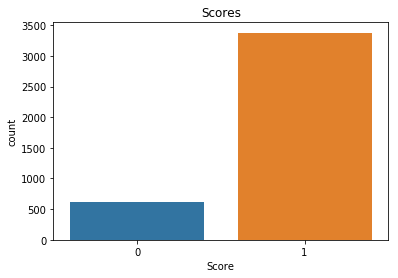

Wall time: 1.84 s


In [29]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
ax=plt.axes()
sns.countplot(data_4000.Score,ax=ax)
plt.title("Scores")
plt.show()
data_4000['Score'].value_counts()

# 1.BOW:

In [30]:
%%time
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

Wall time: 0 ns


In [32]:
%%time
count_vect = CountVectorizer() 
final_counts = count_vect.fit_transform(data_4000['CleanedText'].values)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (4000, 11066)
the number of unique words  11066
Wall time: 258 ms


In [14]:
final_counts = final_counts.todense()

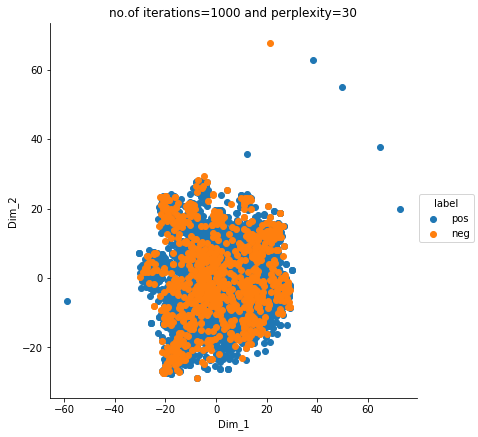

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(final_counts)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: Default step(no.of iterations)=1000 and perplexity=30
plt.title('no.of iterations=1000 and perplexity=30')
plt.show()

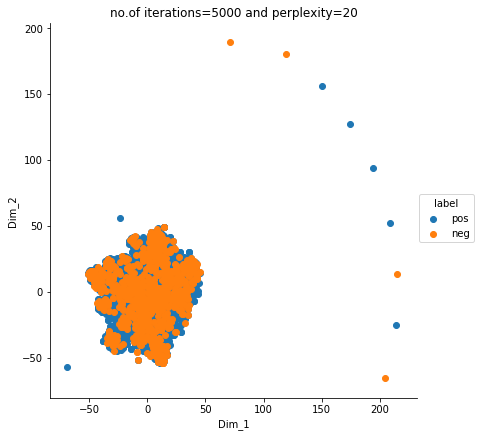

In [18]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=5000)
tsne_data = model.fit_transform(final_counts)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: no.of iterations=5000 and perplexity=20
plt.title('no.of iterations=5000 and perplexity=20')
plt.show()

# Bi-Gram BOW

In [10]:
#bi-gram, tri-gram and n-gram
#removing stop words like "not" should be avoided before building n-grams
count_vect = CountVectorizer(ngram_range=(1,2) ) #in scikit-learn
final_bigram_counts = count_vect.fit_transform(data_4000['CleanedText'].values)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (4000, 129395)
the number of unique words including both unigrams and bigrams  129395


In [11]:
dense_final_bigram_counts=final_bigram_counts.todense()

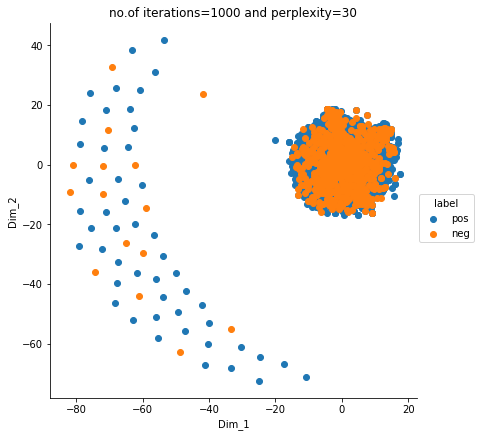

In [12]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(dense_final_bigram_counts)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: Default step(no.of iterations)=1000 and perplexity=30
plt.title('no.of iterations=1000 and perplexity=30')
plt.show()

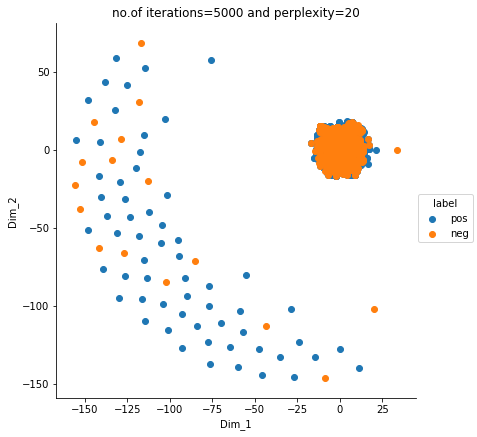

In [13]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=5000)
tsne_data = model.fit_transform(dense_final_bigram_counts)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: no.of iterations=5000 and perplexity=20
plt.title('no.of iterations=5000 and perplexity=20')
plt.show()

# 2.TF-IDF:

In [14]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf = tf_idf_vect.fit_transform(data_4000['CleanedText'].values)
dense_data_tfidf = tf_idf.todense(order=None, out=None)

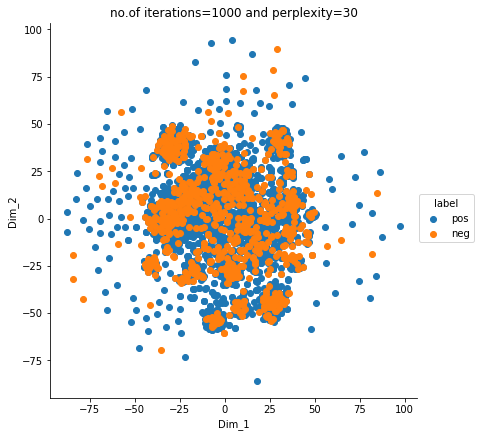

In [15]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(dense_data_tfidf)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: Default step(no.of iterations)=1000 and perplexity=30
plt.title('no.of iterations=1000 and perplexity=30')
plt.show()

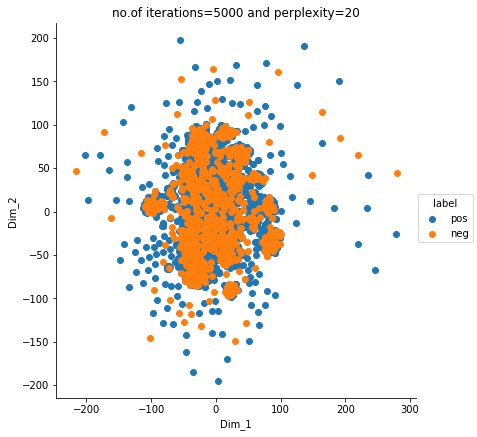

In [16]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=5000)
tsne_data = model.fit_transform(dense_data_tfidf)
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#Note: Default step(no.of iterations)=1000 and perplexity=30
plt.title('no.of iterations=5000 and perplexity=20')
plt.show()

# 3.Avg-W2V:

In [14]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in data_4000['CleanedText'].values:
    list_of_sent.append(sent.split())

In [11]:
print(data_4000['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [14]:
import gensim
from gensim.models import Word2Vec
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [15]:
words = list(w2v_model.wv.vocab)
print(len(words))

3244


In [16]:
w2v_model.wv.most_similar('like')

[('sugar', 0.9784677028656006),
 ('flavor', 0.9682139158248901),
 ('good', 0.9679203033447266),
 ('enjoy', 0.9632592797279358),
 ('tast', 0.9563263654708862),
 ('color', 0.9562267065048218),
 ('sauc', 0.9560551047325134),
 ('add', 0.9523530006408691),
 ('sweet', 0.949026346206665),
 ('make', 0.9464215040206909)]

In [17]:
avg_vec = [] #List to store all the avg w2vec's 
for sent in list_of_sent[0:1]:
    cnt = 0 #to count no of words in each reviews
    sent_vec = np.zeros(50) #Initializing with zeroes
    print("sent:",sent) 
    for word in sent:
        try:
            wvec = w2v_model.wv[word] #Vector of each using w2v model
            print("wvec:",wvec)
            sent_vec += wvec #Adding the vectors 
            cnt += 1
        except: 
            pass #When the word is not in the dictionary then do nothing 
    print("sent_vec:",sent_vec)    
    a_vec =sent_vec / cnt #Taking average of vectors sum of the particular review
    print("avg_vec:",a_vec)
    avg_vec.append(a_vec) #Storing the avg w2vec's for each review
    print("*******************************************************************")

sent: ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
wvec: [-0.00745778  0.07553497 -0.42370561 -0.5432269   0.35780564  0.08516092
  0.48847455 -0.00511451 -0.36347076  0.12774917 -0.45166668  1.3789432
  0.29032144  0.04765173  0.12659422 -0.35394147 -0.74929518 -0.19127679
  0.55135107 -0.32963541  0.49319208  0.07503628 -0.31702667  0.47686821
  0.309459   -0.1443743  -0.21446243  0.27723649 -0.13419867 -0.08429997
  0.75316888 -0.90590996  0.13457078  0.03037884 -0.06701611 -0.30413294
  0.6809572   0.11274612 -0.14869009 -0.14114678 -0.26616085 -0.52047509
 -0.66407073  0.3424283   0.04563013  0.30706081  0.0954745  -0.14975998
 -0.17181967  0.33830711]
wvec: [-0.12944399 -0.02449408 -0.20875345 -0.5261116   0.44275782  0.1164768

In [18]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

4000
50


In [19]:
avg_w2v = np.array(sent_vectors)

In [20]:
avg_w2v = avg_w2v[~np.isnan(avg_w2v)]

In [21]:
shape=avg_w2v.shape
avg_w2v= avg_w2v.reshape(int(shape[0]/50),50)
print(avg_w2v.shape)

(3999, 50)


In [22]:
labels = labels.drop(labels.index[504])
print(labels.shape)

(3999,)


In [23]:
from sklearn import preprocessing
s_data=preprocessing.scale(avg_w2v)
print("standardized data shape is",s_data.shape)

standardized data shape is (3999, 50)


In [66]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_avg_w2v=model.fit_transform(s_data)

In [67]:
print(tsne_avg_w2v.shape)
print(labels.shape)

(3999, 2)
(3998,)


In [37]:
tsne_avg_w2v = np.matrix(np.array(tsne_avg_w2v))

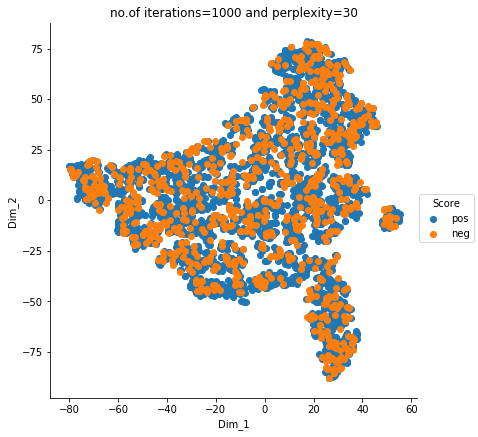

In [38]:
tsne_avg_w2v=np.vstack((tsne_avg_w2v.T,labels)).T
tsne_dataframe1=pd.DataFrame(data=tsne_avg_w2v,columns=('Dim_1','Dim_2','Score'))
sns.FacetGrid(tsne_dataframe1,hue='Score',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('no.of iterations=1000 and perplexity=30')
plt.show()

In [24]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=20,n_iter=5000)
tsne_avg_w2v=model.fit_transform(s_data)

In [25]:
tsne_avg_w2v = np.matrix(np.array(tsne_avg_w2v))

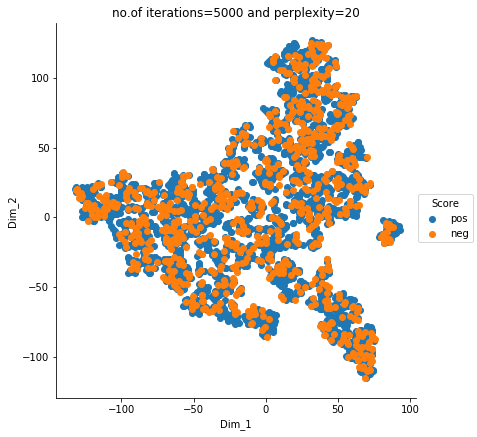

In [26]:
tsne_avg_w2v=np.vstack((tsne_avg_w2v.T,labels)).T
tsne_dataframe1=pd.DataFrame(data=tsne_avg_w2v,columns=('Dim_1','Dim_2','Score'))
sns.FacetGrid(tsne_dataframe1,hue='Score',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('no.of iterations=5000 and perplexity=20')
plt.show()

# 4.Tf-idf- W2V:

In [10]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf = tf_idf_vect.fit_transform(data_4000['CleanedText'].values)

In [11]:
print("shape of tf_idf:",tf_idf.shape)

shape of tf_idf: (4000, 128933)


In [12]:
dense_data_tfidf = tf_idf.todense()

In [15]:
tfidf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vectors = []; 
row=0;
for sent in list_of_sent: 
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            tf_idf = dense_data_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [31]:
tfidf_sent_vectors = np.asarray(tfidf_sent_vectors)

In [32]:
tfidf_sent_vectors.shape

(4000, 50)

In [33]:
for i in range(1000):
    if(all(np.isnan(tfidf_sent_vectors[i]))):
        print(i)

423


In [34]:
tfidf_sent_vectors.shape

(4000, 50)

In [35]:
tfidf_sent_vectors = tfidf_sent_vectors[~np.isnan(tfidf_sent_vectors)]

In [36]:
tfidf_sent_vectors.shape

(199950,)

In [37]:
shape=tfidf_sent_vectors.shape
tfidf_sent_vectors= tfidf_sent_vectors.reshape(int(shape[0]/50),50)
print(tfidf_sent_vectors.shape)

(3999, 50)


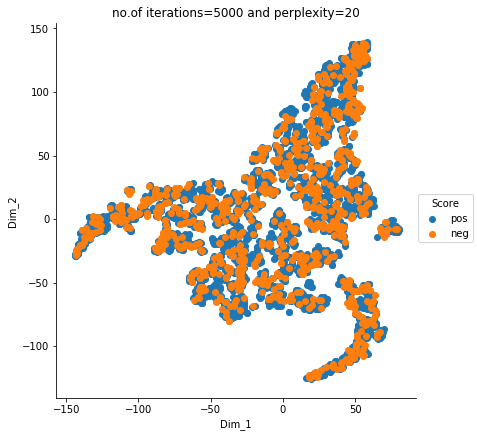

In [39]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,perplexity=20,n_iter=5000)
tsne_data_tfidf_w2v=model.fit_transform(tfidf_sent_vectors)
tsne_data_tfidf_w2v=np.vstack((tsne_data_tfidf_w2v.T,labels)).T
tsne_dataframe_tfidf_w2v=pd.DataFrame(data=tsne_data_tfidf_w2v,columns=('Dim_1','Dim_2','Score'))
sns.FacetGrid(tsne_dataframe_tfidf_w2v,hue='Score',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('no.of iterations=5000 and perplexity=20')
plt.show()

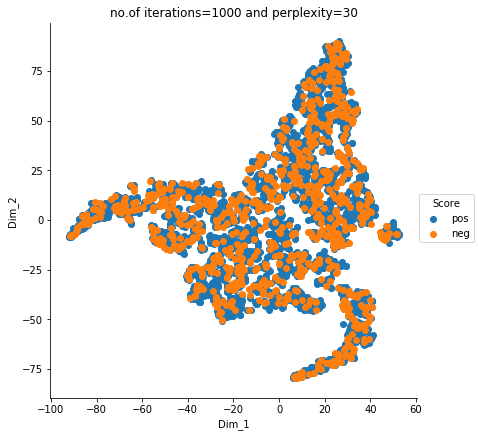

In [40]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data_tfidf_w2v=model.fit_transform(tfidf_sent_vectors)
tsne_data_tfidf_w2v=np.vstack((tsne_data_tfidf_w2v.T,labels)).T
tsne_dataframe_tfidf_w2v=pd.DataFrame(data=tsne_data_tfidf_w2v,columns=('Dim_1','Dim_2','Score'))
sns.FacetGrid(tsne_dataframe_tfidf_w2v,hue='Score',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('no.of iterations=1000 and perplexity=30')
plt.show()